# Health Insurance Project: Data Visualisation and Investigation
---

Import libraries:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import plotly.express as px

---

## Import cleaned data csv

Import the cleaned data that was the outut of the data_cleanup notebook

Also need to reapply the category data types and num columns as the csv doesn't store this data

Finally view the dataframe as a refresher of what we are dealing with

In [2]:
# Import cleaned data csv
insurance = pd.read_csv('../data/insurance_cleaned.csv')

# List of categorical columns to convert back to category dtype
categorical_columns = ['Age_Group', 'Sex', 'BMI_Group', 'Plan', 'Smoker', 'Region']

# Convert specified columns to category dtype
for col in categorical_columns:
    insurance[col] = insurance[col].astype('category')

# Reset numerical versions of the categorical columns in case changed
for col in categorical_columns:
    insurance[f"{col}_num"] = insurance[col].cat.codes

insurance.head()

,Age,Age_Group,Age_Group_num,Sex,Sex_num,BMI,BMI_Group,BMI_Group_num,Children,Plan,Plan_num,Smoker,Smoker_num,Region,Region_num,Charges,Charges_Per_Person,Charges_Outlier,Charges_Per_Person_Outlier
0,19,Ages 18-25,0,Female,0,27.900,Overweight,2,0,Standard,1,Yes,1,Southwest,3,16884.92400,16884.92400,False,False
1,18,Ages 18-25,0,Male,1,33.770,Obese,1,1,Family,0,No,0,Southeast,2,1725.55230,862.77615,False,False
2,28,Ages 26-34,1,Male,1,33.000,Obese,1,3,Family,0,No,0,Southeast,2,4449.46200,1112.36550,False,False
3,33,Ages 26-34,1,Male,1,22.705,Healthy Weight,0,0,Standard,1,No,0,Northwest,1,21984.47061,21984.47061,False,False
4,32,Ages 26-34,1,Male,1,28.880,Overweight,2,0,Standard,1,No,0,Northwest,1,3866.85520,3866.85520,False,False


---

## Data Frequency

Looking at the frequency lets you visualise distribution of data in each category.

#### Create bar charts to look at the frequency age group and bmi group data:

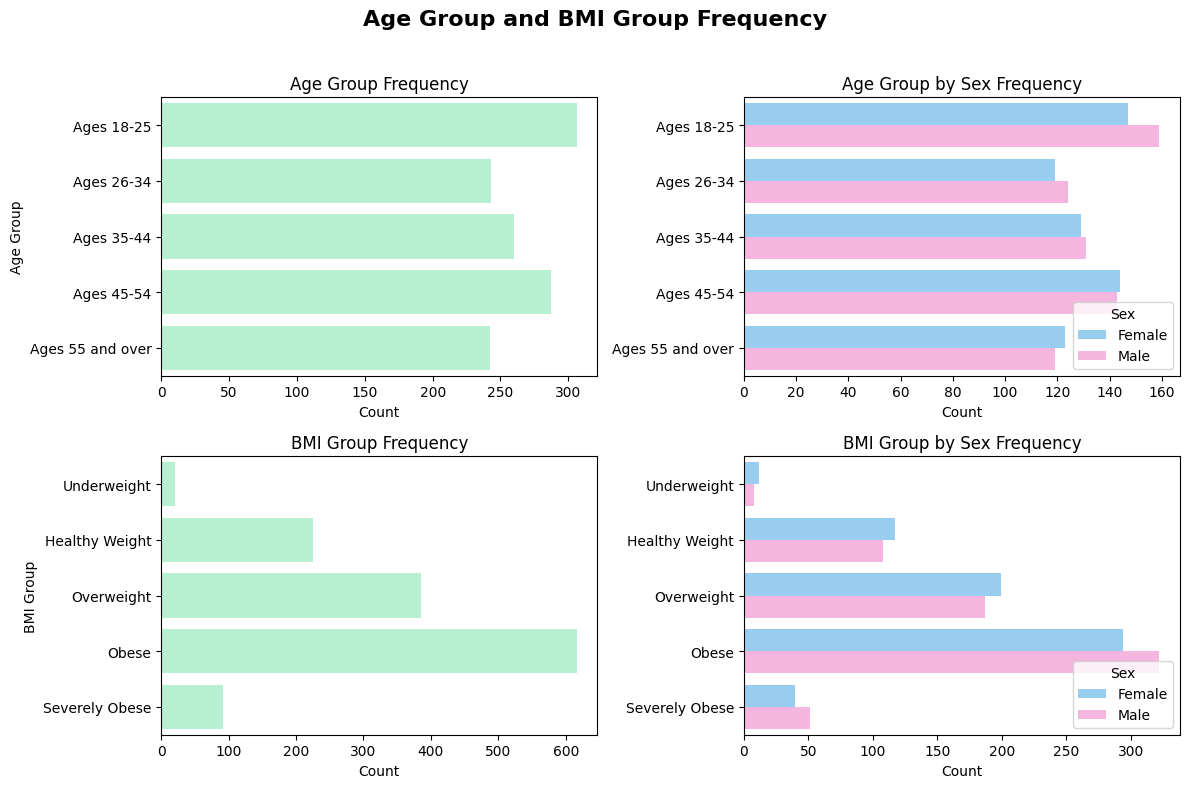

In [102]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Define palettes for male and female
palette_sex = ["#8AD0FF", "#FFAAE3"]

# Top-left: Age group
sns.countplot(y='Age_Group', data=insurance, ax=axs[0, 0], color='#AEF8D2')
axs[0, 0].set_title('Age Group Frequency')
axs[0, 0].set_xlabel('Count')
axs[0, 0].set_ylabel('Age Group')

# Top-right: Age group by sex
sns.countplot(y='Age_Group', data=insurance, hue='Sex', ax=axs[0, 1], palette=palette_sex)
axs[0, 1].set_title('Age Group by Sex Frequency')
axs[0, 1].set_xlabel('Count')
axs[0, 1].set_ylabel('')
axs[0, 1].legend(title='Sex', loc='lower right')

# Bottom-left: BMI group
sns.countplot(y='BMI_Group', data=insurance, ax=axs[1, 0], color="#AEF8D2", order=['Underweight', 'Healthy Weight', 'Overweight', 'Obese', 'Severely Obese'])
axs[1, 0].set_title('BMI Group Frequency')
axs[1, 0].set_xlabel('Count')
axs[1, 0].set_ylabel('BMI Group')

# Bottom-right: BMI group by sex
sns.countplot(y='BMI_Group', data=insurance, hue='Sex', ax=axs[1, 1], palette=palette_sex, order=['Underweight', 'Healthy Weight', 'Overweight', 'Obese', 'Severely Obese'])
axs[1, 1].set_title('BMI Group by Sex Frequency')
axs[1, 1].set_xlabel('Count')
axs[1, 1].set_ylabel('')
axs[1, 1].legend(title='Sex', loc='lower right')

# Add overall title
fig.suptitle('Age Group and BMI Group Frequency', fontsize=16, fontweight='bold')

# Adjust spacing for suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save figure and show
plt.savefig('../charts/age_and_bmi_frequency.png')
plt.show()

In the charts above,

The age group distribution is fairly even with similar frequency of data across all the age groups. The split of male and female in age groups is also fairly even.

The BMI group has a lot more data obese and overweight people, with hardly any underweight people. Again the male and female split in each category is similar.

<br/>

#### Create pie charts to look at the proportional distribution of plan, smoker, region and sex

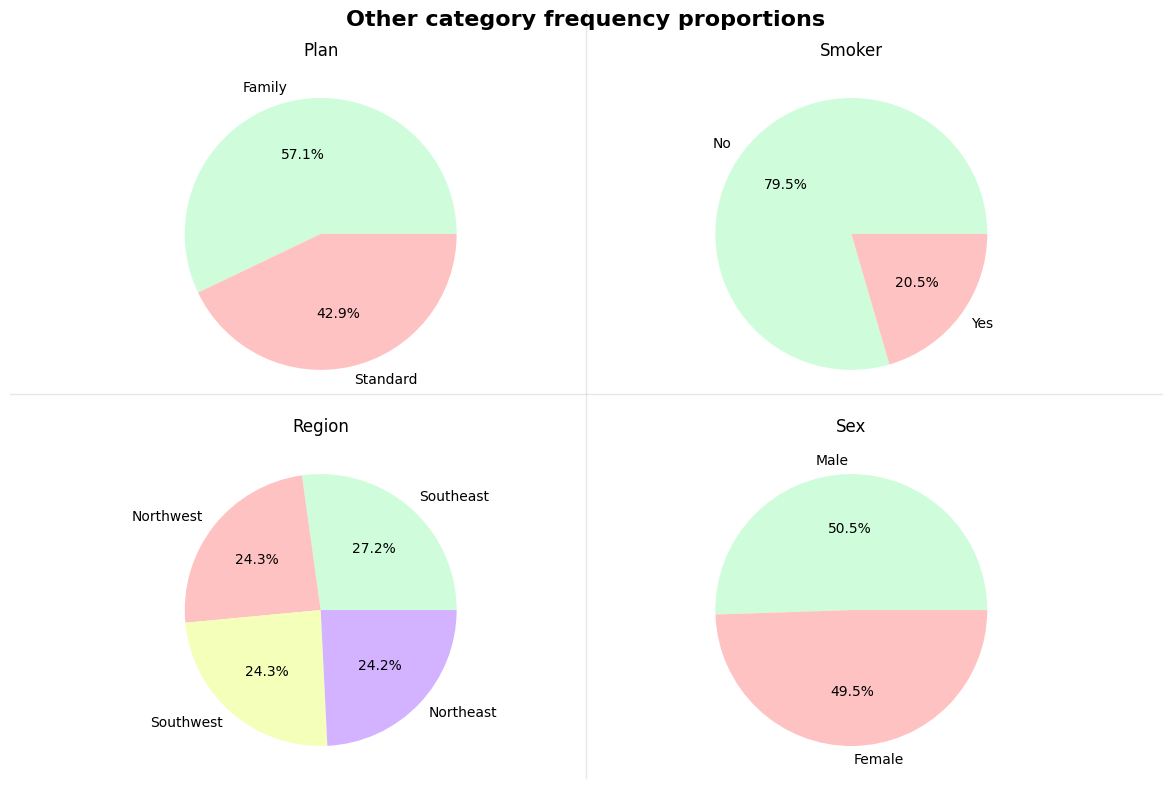

In [5]:
# Get value counts for each category
plan_counts = insurance['Plan'].value_counts(normalize=True)
smoker_counts = insurance['Smoker'].value_counts(normalize=True)
region_counts = insurance['Region'].value_counts(normalize=True)
sex_counts = insurance['Sex'].value_counts(normalize=True)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Top-left: Plan
axs[0, 0].pie(plan_counts.values, labels=plan_counts.index, autopct='%1.1f%%', colors=["#CFFDDB","#FFC2C2"])
axs[0, 0].set_title('Plan')

# Top-right: Smoker
axs[0, 1].pie(smoker_counts.values, labels=smoker_counts.index, autopct='%1.1f%%', colors=["#CFFDDB","#FFC2C2"])
axs[0, 1].set_title('Smoker')

# Bottom-left: Region
axs[1, 0].pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%', colors=["#CFFDDB","#FFC2C2","#F4FFBA","#D3B2FF"])
axs[1, 0].set_title('Region')

# Bottom-right: Sex
axs[1, 1].pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', colors=["#CFFDDB","#FFC2C2"])
axs[1, 1].set_title('Sex')

# Add overall title
fig.suptitle('Other category frequency proportions', fontsize=16, fontweight='bold')

# Adjust spacing for suptitle
plt.tight_layout( pad=1.0)

# Add grid lines to separate the pie charts
fig.add_artist(mlines.Line2D([0.02, 0.98], [0.5, 0.5], color='lightgrey', linewidth=1, alpha=0.5, transform=fig.transFigure))
fig.add_artist(mlines.Line2D([0.5, 0.5], [0.02, 0.98], color='lightgrey', linewidth=1, alpha=0.5, transform=fig.transFigure))

# Save figure and show
plt.savefig('../charts/plan_smoker_region_sex_frequency_pies.png')
plt.show()

In the charts above you can see there is a fairly even split between all regions and sex for the data collected, there are a few more on the family plan and a lot more non-smoker data recorded than smoker.

---

## Charges Distribution

Create a histogram showing the distribution of charges and look at how much being a smoker affects the charge

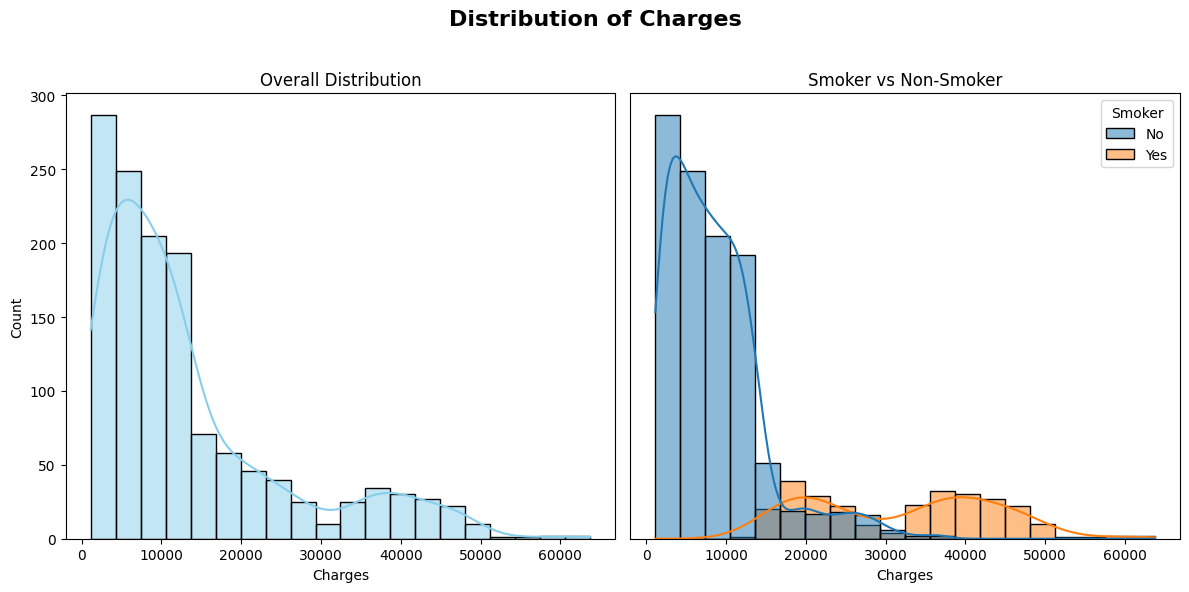

In [104]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# left: Overall
sns.histplot(data=insurance, x="Charges", kde=True, bins=20, color="skyblue", ax=axs[0])
axs[0].set_title('Overall Distribution')

# right: Split by Smoker
sns.histplot(data=insurance, x="Charges", hue="Smoker", kde=True, bins=20, color="skyblue", ax=axs[1])
axs[1].set_title('Smoker vs Non-Smoker')
axs[1].yaxis.set_visible(False)
axs[1].set_ylabel('')

# Add overall title
fig.suptitle('Distribution of Charges', fontsize=16, fontweight='bold')

# Adjust spacing for suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save figure and show
plt.savefig('../charts/distribution_of_charges_histogram.png')
plt.show()

In the charts above, the charges are very much skewed towards the lower end, however when looking at smokers, they are generally charged much more than the non-smokers.

---

## Look at correlations

Display the numerical correlation figures between all numerical fields:

In [30]:
corr = insurance.corr(numeric_only=True)
corr

,Age,Age_Group_num,Sex_num,BMI,BMI_Group_num,Children,Plan_num,Smoker_num,Region_num,Charges,Charges_Per_Person,Charges_Outlier,Charges_Per_Person_Outlier
Age,1.000000,0.981076,-0.020856,0.109272,0.017290,0.042469,-0.047075,-0.025019,0.002127,0.299008,0.255385,0.045385,0.028848
Age_Group_num,0.981076,1.000000,-0.019471,0.103867,0.026437,0.044385,-0.050830,-0.032231,-0.000799,0.283101,0.242503,0.040787,0.022191
Sex_num,-0.020856,-0.019471,1.000000,0.046371,0.002367,0.017163,-0.015111,0.076185,0.004588,0.057292,0.033293,0.091974,0.016023
BMI,0.109272,0.103867,0.046371,1.000000,0.293980,0.012759,-0.016082,0.003750,0.157566,0.198341,0.147951,0.273755,0.097406
BMI_Group_num,0.017290,0.026437,0.002367,0.293980,1.000000,-0.015702,0.007068,-0.003219,0.024772,0.009626,0.000699,0.008734,-0.013111
Children,0.042469,0.044385,0.017163,0.012759,-0.015702,1.000000,-0.787569,0.007673,0.016569,0.067998,-0.358042,0.026032,-0.226991
Plan_num,-0.047075,-0.050830,-0.015111,-0.016082,0.007068,-0.787569,1.000000,-0.009526,-0.013685,-0.064760,0.377916,-0.037766,0.282192
Smoker_num,-0.025019,-0.032231,0.076185,0.003750,-0.003219,0.007673,-0.009526,1.000000,-0.002181,0.787251,0.644125,0.652745,0.464901
Region_num,0.002127,-0.000799,0.004588,0.157566,0.024772,0.016569,-0.013685,-0.002181,1.000000,-0.006208,0.001291,0.056152,0.018939
Charges,0.299008,0.283101,0.057292,0.198341,0.009626,0.067998,-0.064760,0.787251,-0.006208,1.000000,0.794085,0.810986,0.524274


Create a heatmap to visually show the correlation:

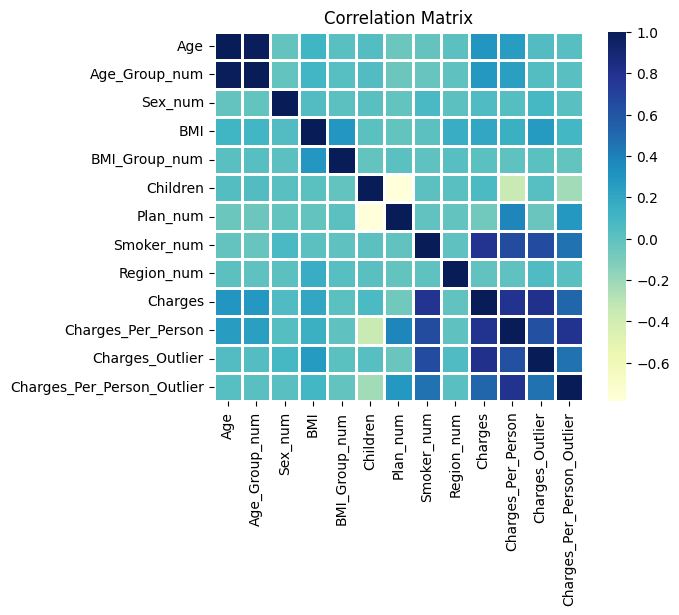

In [32]:
# Create a heatmap to visually show the correlation
sns.heatmap(corr, cmap="YlGnBu", square=True, linewidths=1, linecolor="white")
plt.title("Correlation Matrix")

# Save figure and show
plt.savefig('../charts/correlation_matrix_heatmap.png')
plt.show()

Looking at both the table and coloured heatmap above, if we ignore the obvious correlations between things like age and age group that are expected, it shows a strong correlation between smoker and charges, suggesting that being a smoker is the main thing that affects how much you are charged. There is a weaker correlation between age/age_group and charges and plan and charges too. 

---

## How does smoking affect charge distribution

Create a violin plot to show how smoking affects the distribution of charges for each of the different categories

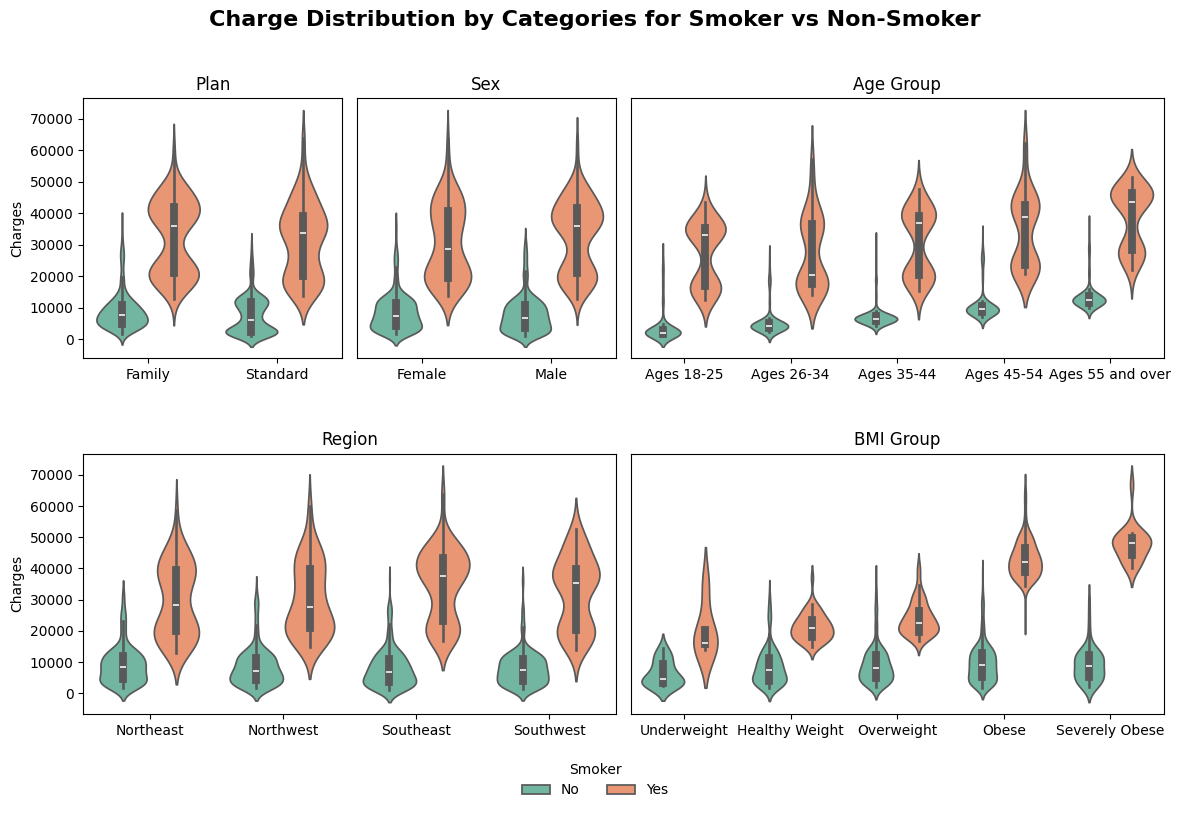

In [103]:
# Create a grid layout for multiple violin plots
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 4)

# Create subplots
ax1 = fig.add_subplot(gs[0, 0:1])
ax2 = fig.add_subplot(gs[0, 1:2])
ax3 = fig.add_subplot(gs[0, 2:4])
ax4 = fig.add_subplot(gs[1, 0:2])
ax5 = fig.add_subplot(gs[1, 2:4])

# Create violin plots
sns.violinplot(data=insurance, x="Plan", y="Charges", hue="Smoker", palette="Set2", ax=ax1)
sns.violinplot(data=insurance, x="Sex", y="Charges", hue="Smoker", palette="Set2", ax=ax2)
sns.violinplot(data=insurance, x="Age_Group", y="Charges", hue="Smoker", palette="Set2", ax=ax3)
sns.violinplot(data=insurance, x="Region", y="Charges", hue="Smoker", palette="Set2", ax=ax4)
sns.violinplot(data=insurance, x="BMI_Group", y="Charges", hue="Smoker", palette="Set2", ax=ax5, 
               order=['Underweight', 'Healthy Weight', 'Overweight', 'Obese', 'Severely Obese'])

# Set plot titles
ax1.set_title('Plan')
ax2.set_title('Sex')
ax3.set_title('Age Group')
ax4.set_title('Region')
ax5.set_title('BMI Group')

# Remove y-axis from all but the first column plots
for ax in [ax2, ax3, ax5]:
    ax.yaxis.set_visible(False)
    ax.set_ylabel('')

# Remove legends and x-labels for all plots
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.legend_.remove()
    ax.set_xlabel('')

# Get handles and labels from one plot to create a shared legend
handles, labels = ax1.get_legend_handles_labels()

# Add shared legend centered below plots
fig.legend(
    handles, labels,
    title='Smoker',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.02),
    ncol=2,
    frameon=False
)

# Add overall title
fig.suptitle('Charge Distribution by Categories for Smoker vs Non-Smoker', fontsize=16, fontweight='bold')

# Adjust spacing for suptitle with some spacing inbetween the rows
plt.tight_layout(rect=[0, 0, 1, 0.96], h_pad=4.0)

# make space for the legend
plt.subplots_adjust(bottom=0.1)

# Save figure and show
plt.savefig('../charts/distribution_of_charges_violin.png')
plt.show()


The chart above clearly shows that smokers receive higher charges, no matter what other factors, however obese and severerly obese smokers have the highest increase in charges. The only other category that has a slight increase in charges is the age group, causing a slight increase as they get older.

Create a scatter chart to show how much affect BMI and age have on both smokers and non-smokers:

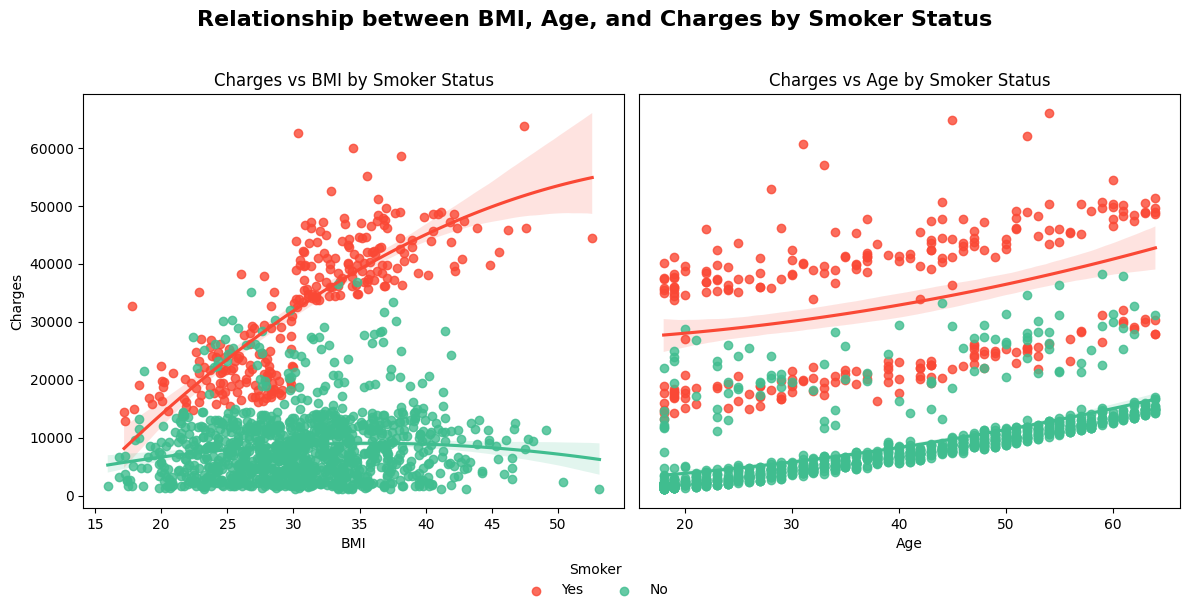

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for smokers BMI vs Charges
sns.regplot(
    data=insurance[insurance['Smoker'] == 'Yes'],
    x="BMI", y="Charges",
    order=2,
    scatter=True, 
    color="#FA4835",
    label="Yes",
    ax=axs[0]
)

# Plot for non-smokers BMI vs Charges
sns.regplot(
    data=insurance[insurance['Smoker'] == 'No'],
    x="BMI", y="Charges",
    order=2,
    scatter=True,
    color="#40BD8F", 
    label="No",
    ax=axs[0]
)

# Set title and hide y-axis label for BMI plot
axs[0].set_title("Charges vs BMI by Smoker Status")
axs[0].legend()

# Plot for smokers Age vs Charges
sns.regplot(
    data=insurance[insurance['Smoker'] == 'Yes'],
    x="Age", y="Charges",
    order=2,
    scatter=True, 
    color="#FA4835",
    label="Yes",
    ax=axs[1]
)

# Plot for non-smokers Age vs Charges
sns.regplot(
    data=insurance[insurance['Smoker'] == 'No'],
    x="Age", y="Charges",
    order=2,
    scatter=True,
    color="#40BD8F", 
    label="No",
    ax=axs[1]
)

# Set title, hide legend and hide y-axis for Age plot
axs[1].set_title("Charges vs Age by Smoker Status")
axs[1].legend()
axs[1].yaxis.set_visible(False)
axs[1].set_ylabel('')

# Remove individual legends
for ax in axs:
    ax.legend_.remove()

# Shared legend (note axs[0], not ax[0])
handles, labels = axs[0].get_legend_handles_labels()

# Add shared legend centered below plots
fig.legend(
    handles, labels,
    title='Smoker',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.02),
    ncol=2,
    frameon=False
)

# Add overall title
fig.suptitle('Relationship between BMI, Age, and Charges by Smoker Status', fontsize=16, fontweight='bold')

# Adjust spacing for suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

# make space for the legend
plt.subplots_adjust(bottom=0.15)

# Save figure and show
plt.savefig('../charts/charges_vs_bmi_and_age_scatter.png')
plt.show()



The first scatter chart above deonstrates that a higher BMI for smokers has a dramatic impact on the charges, where as non-smokers it has much less of an effect.

The second chart shows that age has a gradual increase in charges that is generally consistent for both smoker and non-smokers.

---
